# Cellular neighborhood analysis of cells in both slides 991 and 992
**Goal:**  Perform cellular neighborhood analysis    
**Input:** Merged adata from 991 and 992    
**Output:** Cellular neighborhood categories for all cells     
**Author:** Jose Nimo    
**Date_of_creation:** 15.01.2025     
**Date_of_latest_modification:** 15.04.2025    
**Status:** In Progress

# Setup and imports

In [36]:
import os,sys,time
from loguru import logger 

# import scimap as sm

import numpy as np
import pandas as pd
import shapely
import geopandas as gpd
import anndata as ad

import pyarrow
import ast

#plotting
import matplotlib.pyplot as plt
import seaborn as sns

#custom functions
sys.path.append(os.path.abspath('/Users/jnimoca/Jose_BI/1_Pipelines/openDVP/src/'))
from opendvp import anndata_utils, filtering, imaging, utils
import importlib

for package in [np,pd,gpd,ad]:
    print(f"{package.__name__} {package.__version__}")

numpy 1.26.4
pandas 2.2.2
geopandas 1.0.1
anndata 0.11.3


## Create recurrent cellular neighborhood labels for all cells in 991 and 992

In [4]:
adata = ad.read_h5ad("../data/perSample/991_992/0_concat/20250303_1336_0_concat_adata.h5ad")

/Users/jnimoca/Jose_BI/4_Projects/P26_BCCN/P26E10_E11_ImageAnalysis/.pixi/envs/default/lib/python3.11/site-packages/anndata/_core/anndata.py:1754: UserWarning:

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.



In [5]:
adata.obs_names_make_unique()

In [7]:
knn_list = [7,14,21,30,40,50]

for knn_number in knn_list:
    logger.info(f"Processing knn={knn_number}")
    start = time.time()

    adata = sm.tl.spatial_lda(adata, 
                              method='knn', 
                              knn=knn_number, 
                              label=f'spatial_lda_knn{knn_number}')
    
    adata = sm.tl.spatial_cluster(adata, 
                                  df_name=f'spatial_lda_knn{knn_number}', 
                                  method='kmeans', 
                                  k=7, 
                                  label=f'spatial_lda_knn{knn_number}_kmeans_k7')

    logger.info(f"Done in {time.time()-start} seconds")

2025-03-03 15:55:02.641 | INFO     | __main__:<module>:4 - Processing knn=7


Processing: [991]
Identifying the 7 nearest neighbours for every cell
Processing: [992]
Identifying the 7 nearest neighbours for every cell
Pre-Processing Spatial LDA
Training Spatial LDA
Calculating the Coherence Score

Coherence Score:  0.3178528435660482
Gathering the latent weights
Kmeans clustering


2025-03-03 15:57:25.338 | INFO     | __main__:<module>:18 - Done in 142.69472813606262 seconds
2025-03-03 15:57:25.339 | INFO     | __main__:<module>:4 - Processing knn=14


Processing: [991]
Identifying the 14 nearest neighbours for every cell
Processing: [992]
Identifying the 14 nearest neighbours for every cell
Pre-Processing Spatial LDA
Training Spatial LDA
Calculating the Coherence Score

Coherence Score:  0.34420324107822475
Gathering the latent weights
Kmeans clustering


2025-03-03 16:00:48.351 | INFO     | __main__:<module>:18 - Done in 203.0119869709015 seconds
2025-03-03 16:00:48.352 | INFO     | __main__:<module>:4 - Processing knn=21


Processing: [991]
Identifying the 21 nearest neighbours for every cell
Processing: [992]
Identifying the 21 nearest neighbours for every cell
Pre-Processing Spatial LDA
Training Spatial LDA
Calculating the Coherence Score

Coherence Score:  0.3516907772022454
Gathering the latent weights
Kmeans clustering


2025-03-03 16:04:48.706 | INFO     | __main__:<module>:18 - Done in 240.3536880016327 seconds
2025-03-03 16:04:48.706 | INFO     | __main__:<module>:4 - Processing knn=30


Processing: [991]
Identifying the 30 nearest neighbours for every cell
Processing: [992]
Identifying the 30 nearest neighbours for every cell
Pre-Processing Spatial LDA
Training Spatial LDA
Calculating the Coherence Score

Coherence Score:  0.35583355796432947
Gathering the latent weights
Kmeans clustering


2025-03-03 16:09:31.288 | INFO     | __main__:<module>:18 - Done in 282.58131408691406 seconds
2025-03-03 16:09:31.289 | INFO     | __main__:<module>:4 - Processing knn=40


Processing: [991]
Identifying the 40 nearest neighbours for every cell
Processing: [992]
Identifying the 40 nearest neighbours for every cell
Pre-Processing Spatial LDA
Training Spatial LDA
Calculating the Coherence Score

Coherence Score:  0.3577975141441595
Gathering the latent weights
Kmeans clustering


2025-03-03 16:15:07.620 | INFO     | __main__:<module>:18 - Done in 336.3305866718292 seconds
2025-03-03 16:15:07.621 | INFO     | __main__:<module>:4 - Processing knn=50


Processing: [991]
Identifying the 50 nearest neighbours for every cell
Processing: [992]
Identifying the 50 nearest neighbours for every cell
Pre-Processing Spatial LDA
Training Spatial LDA
Calculating the Coherence Score

Coherence Score:  0.3593188273293075
Gathering the latent weights
Kmeans clustering


2025-03-03 16:38:11.138 | INFO     | __main__:<module>:18 - Done in 1383.5169188976288 seconds


In [ ]:
anndata_utils.save_adata_checkpoint(adata, path_to_dir="../data/perSample/991_992", checkpoint_name="1_spatial_LDA" )

2025-03-03 16:54:17.626 | INFO     | opendvp.anndata_utils:save_adata_checkpoint:73 - Writing h5ad
2025-03-03 16:54:22.675 | SUCCESS  | opendvp.anndata_utils:save_adata_checkpoint:75 - Wrote h5ad file
2025-03-03 16:54:22.676 | INFO     | opendvp.anndata_utils:save_adata_checkpoint:82 - Writing parquet
2025-03-03 16:54:23.129 | SUCCESS  | opendvp.anndata_utils:save_adata_checkpoint:84 - Wrote parquet file


## QC with QuPath

### export RCN as geojsons for 991

In [7]:
import geopandas as gpd
import json
import anndata as ad

In [8]:
adata = ad.read_h5ad("../data/perSample/991_992/1_spatial_LDA/20250303_1654_1_spatial_LDA_adata.h5ad")

In [9]:
adata

AnnData object with n_obs × n_vars = 1615233 × 8
    obs: 'CellID', 'Y_centroid', 'X_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Orientation', 'Extent', 'Solidity', 'artefact', 'Area_filter_nottoobig', 'Area_filter_nottoolow', 'Area_filter', 'DAPI_ratio', 'DAPI_ratio_pass_nottoolow', 'DAPI_ratio_pass_nottoohigh', 'DAPI_ratio_pass', 'filtering', 'imageid', 'phenotype', 'cell_id', 'spatial_lda_knn7_kmeans_k7', 'spatial_lda_knn14_kmeans_k7', 'spatial_lda_knn21_kmeans_k7', 'spatial_lda_knn30_kmeans_k7', 'spatial_lda_knn40_kmeans_k7', 'spatial_lda_knn50_kmeans_k7'
    uns: 'spatial_lda_knn14', 'spatial_lda_knn14_probability', 'spatial_lda_knn21', 'spatial_lda_knn21_probability', 'spatial_lda_knn30', 'spatial_lda_knn30_probability', 'spatial_lda_knn40', 'spatial_lda_knn40_probability', 'spatial_lda_knn50', 'spatial_lda_knn50_probability', 'spatial_lda_knn7', 'spatial_lda_knn7_probability'
    layers: 'log'

In [10]:
adata.obs.columns

Index(['CellID', 'Y_centroid', 'X_centroid', 'Area', 'MajorAxisLength',
       'MinorAxisLength', 'Eccentricity', 'Orientation', 'Extent', 'Solidity',
       'artefact', 'Area_filter_nottoobig', 'Area_filter_nottoolow',
       'Area_filter', 'DAPI_ratio', 'DAPI_ratio_pass_nottoolow',
       'DAPI_ratio_pass_nottoohigh', 'DAPI_ratio_pass', 'filtering', 'imageid',
       'phenotype', 'cell_id', 'spatial_lda_knn7_kmeans_k7',
       'spatial_lda_knn14_kmeans_k7', 'spatial_lda_knn21_kmeans_k7',
       'spatial_lda_knn30_kmeans_k7', 'spatial_lda_knn40_kmeans_k7',
       'spatial_lda_knn50_kmeans_k7'],
      dtype='object')

In [13]:
adata.obs.imageid.value_counts()

imageid
992    1005051
991     610182
Name: count, dtype: int64

In [14]:
adata.obs.imageid.dtype

dtype('int64')

In [15]:
adata_991 = adata[adata.obs["imageid"]==991].copy()
adata_991.obs

,CellID,Y_centroid,X_centroid,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Orientation,Extent,Solidity,...,filtering,imageid,phenotype,cell_id,spatial_lda_knn7_kmeans_k7,spatial_lda_knn14_kmeans_k7,spatial_lda_knn21_kmeans_k7,spatial_lda_knn30_kmeans_k7,spatial_lda_knn40_kmeans_k7,spatial_lda_knn50_kmeans_k7
0,1,29410.806452,35874.857801,1519.0,98.696620,30.646839,0.950568,-1.524977,228.651804,0.676615,...,True,991,Cancer_cells,991_1,0,3,2,5,3,6
1,2,29445.080408,36162.243140,1567.0,50.422862,39.687556,0.616832,0.160002,148.710678,0.975109,...,True,991,Cancer_cells,991_2,2,3,2,5,3,6
2,3,29505.171707,38455.235122,1025.0,40.280587,34.195207,0.528513,-0.346644,131.438600,0.927602,...,True,991,Cancer_cells,991_3,0,0,1,0,3,6
3,4,29539.721673,35060.844867,1315.0,61.049935,28.208869,0.886848,-1.447088,151.254834,0.947406,...,True,991,CD4_Tcells,991_4,3,5,0,2,4,2
4,5,29982.642779,36765.660558,3656.0,84.178897,57.384893,0.731630,0.251203,243.379726,0.926743,...,True,991,Cancer_cells,991_5,0,0,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685800,685801,40389.067593,46087.962963,1080.0,56.372404,25.352581,0.893163,1.002754,141.610173,0.961710,...,True,991,COL1A1_cells,991_685801,1,5,0,2,4,4
685801,685802,40382.629182,47716.017658,1076.0,41.856049,34.076776,0.580666,1.330143,129.396970,0.951370,...,True,991,Cancer_cells,991_685802,0,0,1,0,1,3
685802,685803,40382.072917,48436.798177,768.0,33.256837,29.969709,0.433488,0.983058,105.254834,0.957606,...,True,991,CD8_Tcells,991_685803,1,5,6,6,0,5
685803,685804,40383.786948,45011.021113,1042.0,45.051210,31.924524,0.705583,1.218499,133.189863,0.964815,...,True,991,Unknown,991_685804,6,6,0,6,4,2


In [19]:
# 991
# load gdf with segmentation mask
gdf = gpd.read_file("../data/perSample/991/qc/20250410_991_segmentation_as_polygons.geojson")

In [20]:
gdf

,cellId,geometry
0,262908,"POLYGON ((38223 0, 38222 3, 38226 9, 38233 11,..."
1,262909,"POLYGON ((38270 0, 38270 6, 38267 12, 38274 18..."
2,262912,"POLYGON ((39148 0, 39147 3, 39150 11, 39157 15..."
3,262911,"POLYGON ((38413 0, 38410 9, 38414 17, 38416 18..."
4,651333,"POLYGON ((40289 0, 40286 7, 40285 15, 40291 25..."
...,...,...
685800,622146,"POLYGON ((63773 44428, 63764 44434, 63758 4444..."
685801,582148,"POLYGON ((65461 44415, 65449 44417, 65444 4442..."
685802,582203,"POLYGON ((66747 44435, 66740 44439, 66739 4444..."
685803,582214,"POLYGON ((66848 44445, 66829 44448, 66817 4444..."


In [21]:
#load color_dict
with open("../assets/RCN_colors.json", "r") as f:
    loaded_dict = json.load(f)

In [35]:
importlib.reload(anndata_utils)

<module 'opendvp.anndata_utils' from '/Users/jnimoca/Jose_BI/1_Pipelines/openDVP/src/opendvp/anndata_utils.py'>

In [42]:
adata.obs.spatial_lda_knn21_kmeans_k7.dtype

CategoricalDtype(categories=['0', '1', '2', '3', '4', '5', '6'], ordered=False, categories_dtype=object)

In [24]:
anndata_utils.color_geojson_w_adata(
    geodataframe = gdf,
    geodataframe_index_key = "cellId",
    adata=adata_991,
    adata_obs_index_key="CellID",
    adata_obs_category_key="spatial_lda_knn21_kmeans_k7",
    color_dict = loaded_dict,
    export_path = "../data/perSample/991/qc/20250410_991_RCN_mask.geojson"
)

2025-04-10 16:31:33.879 | INFO     | opendvp.anndata_utils:color_geojson_w_adata:147 -  -- Adding color to polygons for QuPath visualization -- 
2025-04-10 16:31:33.990 | WARNING  | opendvp.anndata_utils:color_geojson_w_adata:157 - Data types between geodaframe int32 and adataobs col int64 do not match
2025-04-10 16:31:33.991 | INFO     | opendvp.anndata_utils:color_geojson_w_adata:160 - Matching gdf[cellId] to adata.obs[CellID]
2025-04-10 16:31:34.016 | INFO     | opendvp.utils:parse_color_for_qupath:121 - Parsing colors compatible with QuPath
2025-04-10 16:31:34.017 | INFO     | opendvp.utils:parse_color_for_qupath:130 - Custom color dictionary passed, adapting to QuPath color format
2025-04-10 16:31:36.830 | INFO     | opendvp.anndata_utils:color_geojson_w_adata:192 - Simplifying the geometry with tolerance 1
2025-04-10 16:31:43.585 | INFO     | opendvp.anndata_utils:color_geojson_w_adata:195 - Simplified all polygons in 6.8 seconds
2025-04-10 16:31:43.585 | INFO     | opendvp.annda

In [36]:
anndata_utils.adataobs_to_voronoi_geojson(
    df = adata.obs,
    imageid = 991,
    subset = None,
    category_1 = "phenotype",
    category_2 = "spatial_lda_knn21_kmeans_k7",
    output_path = "../data/perSample/991/qc/"
)

2025-04-10 16:57:08.630 | DEBUG    | opendvp.anndata_utils:adataobs_to_voronoi_geojson:226 -  df shape: (1615233, 28)
2025-04-10 16:57:08.842 | DEBUG    | opendvp.anndata_utils:adataobs_to_voronoi_geojson:234 -  df shape after imageid subset: (610182, 28)
2025-04-10 16:57:08.842 | INFO     | opendvp.anndata_utils:adataobs_to_voronoi_geojson:235 - Processing 991, loaded dataframe
2025-04-10 16:57:08.843 | INFO     | opendvp.anndata_utils:adataobs_to_voronoi_geojson:251 - Running Voronoi
2025-04-10 16:57:34.776 | INFO     | opendvp.anndata_utils:adataobs_to_voronoi_geojson:261 - Voronoi done
2025-04-10 16:57:34.853 | INFO     | opendvp.anndata_utils:adataobs_to_voronoi_geojson:265 - Transformed to geodataframe
2025-04-10 16:57:34.856 | INFO     | opendvp.anndata_utils:adataobs_to_voronoi_geojson:273 - Bounding box: x_min: 878.0318021201414, x_max: 71605.30902111324, y_min: 6.78003120124805, y_max 42764.688888888886
2025-04-10 16:57:39.396 | INFO     | opendvp.anndata_utils:adataobs_to_vo

## Export 992 RCNs 

In [37]:
adata_992 = adata[adata.obs.imageid==992].copy()
adata_992

AnnData object with n_obs × n_vars = 1005051 × 8
    obs: 'CellID', 'Y_centroid', 'X_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Orientation', 'Extent', 'Solidity', 'artefact', 'Area_filter_nottoobig', 'Area_filter_nottoolow', 'Area_filter', 'DAPI_ratio', 'DAPI_ratio_pass_nottoolow', 'DAPI_ratio_pass_nottoohigh', 'DAPI_ratio_pass', 'filtering', 'imageid', 'phenotype', 'cell_id', 'spatial_lda_knn7_kmeans_k7', 'spatial_lda_knn14_kmeans_k7', 'spatial_lda_knn21_kmeans_k7', 'spatial_lda_knn30_kmeans_k7', 'spatial_lda_knn40_kmeans_k7', 'spatial_lda_knn50_kmeans_k7'
    uns: 'spatial_lda_knn14', 'spatial_lda_knn14_probability', 'spatial_lda_knn21', 'spatial_lda_knn21_probability', 'spatial_lda_knn30', 'spatial_lda_knn30_probability', 'spatial_lda_knn40', 'spatial_lda_knn40_probability', 'spatial_lda_knn50', 'spatial_lda_knn50_probability', 'spatial_lda_knn7', 'spatial_lda_knn7_probability'
    layers: 'log'

In [38]:
# 992
# load gdf with segmentation mask
gdf = gpd.read_file("../data/perSample/992/qc/20250410_992_segmentation_as_polygons.geojson")

In [39]:
anndata_utils.color_geojson_w_adata(
    geodataframe = gdf,
    geodataframe_index_key = "cellId",
    adata=adata_992,
    adata_obs_index_key="CellID",
    adata_obs_category_key="spatial_lda_knn21_kmeans_k7",
    color_dict = loaded_dict,
    export_path = "../data/perSample/992/qc/20250410_992_RCN_mask.geojson"
)

2025-04-10 17:04:12.072 | INFO     | opendvp.anndata_utils:color_geojson_w_adata:153 -  -- Adding color to polygons for QuPath visualization -- 
2025-04-10 17:04:12.251 | WARNING  | opendvp.anndata_utils:color_geojson_w_adata:163 - Data types between geodaframe int32 and adataobs col int64 do not match
2025-04-10 17:04:12.252 | INFO     | opendvp.anndata_utils:color_geojson_w_adata:166 - Matching gdf[cellId] to adata.obs[CellID]
2025-04-10 17:04:12.292 | INFO     | opendvp.utils:parse_color_for_qupath:121 - Parsing colors compatible with QuPath
2025-04-10 17:04:12.292 | INFO     | opendvp.utils:parse_color_for_qupath:130 - Custom color dictionary passed, adapting to QuPath color format
2025-04-10 17:04:16.254 | INFO     | opendvp.anndata_utils:color_geojson_w_adata:198 - Simplifying the geometry with tolerance 1
2025-04-10 17:04:27.025 | INFO     | opendvp.anndata_utils:color_geojson_w_adata:201 - Simplified all polygons in 10.8 seconds
2025-04-10 17:04:27.027 | INFO     | opendvp.annd

In [40]:
anndata_utils.adataobs_to_voronoi_geojson(
    df = adata.obs,
    imageid = 992,
    subset = None,
    category_1 = "phenotype",
    category_2 = "spatial_lda_knn21_kmeans_k7",
    output_path = "../data/perSample/992/qc/"
)

2025-04-10 17:06:21.880 | DEBUG    | opendvp.anndata_utils:adataobs_to_voronoi_geojson:226 -  df shape: (1615233, 28)
2025-04-10 17:06:22.076 | DEBUG    | opendvp.anndata_utils:adataobs_to_voronoi_geojson:234 -  df shape after imageid subset: (1005051, 28)
2025-04-10 17:06:22.077 | INFO     | opendvp.anndata_utils:adataobs_to_voronoi_geojson:235 - Processing 992, loaded dataframe
2025-04-10 17:06:22.077 | INFO     | opendvp.anndata_utils:adataobs_to_voronoi_geojson:251 - Running Voronoi
2025-04-10 17:07:03.440 | INFO     | opendvp.anndata_utils:adataobs_to_voronoi_geojson:261 - Voronoi done
2025-04-10 17:07:03.637 | INFO     | opendvp.anndata_utils:adataobs_to_voronoi_geojson:265 - Transformed to geodataframe
2025-04-10 17:07:03.642 | INFO     | opendvp.anndata_utils:adataobs_to_voronoi_geojson:273 - Bounding box: x_min: 2216.9608763693273, x_max: 70848.77680906713, y_min: 20.43081312410842, y_max 47084.98548812665
2025-04-10 17:07:11.118 | INFO     | opendvp.anndata_utils:adataobs_to_

# 15.04.2025 export RCN in mask in new colors

In [11]:
adata = ad.read_h5ad("../data/perSample/991_992/2_spatial_distance/20250411_1544_2_spatial_distance_adata.h5ad")

In [12]:
adata_991 = adata[adata.obs.imageid==991].copy()
adata_991

AnnData object with n_obs × n_vars = 610182 × 8
    obs: 'CellID', 'Y_centroid', 'X_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Orientation', 'Extent', 'Solidity', 'artefact', 'Area_filter_nottoobig', 'Area_filter_nottoolow', 'Area_filter', 'DAPI_ratio', 'DAPI_ratio_pass_nottoolow', 'DAPI_ratio_pass_nottoohigh', 'DAPI_ratio_pass', 'filtering', 'imageid', 'phenotype', 'cell_id', 'spatial_lda_knn7_kmeans_k7', 'spatial_lda_knn14_kmeans_k7', 'spatial_lda_knn21_kmeans_k7', 'spatial_lda_knn30_kmeans_k7', 'spatial_lda_knn40_kmeans_k7', 'spatial_lda_knn50_kmeans_k7'
    uns: 'spatial_distance', 'spatial_interaction_radius', 'spatial_interaction_radius_perimage', 'spatial_lda_knn14', 'spatial_lda_knn14_probability', 'spatial_lda_knn21', 'spatial_lda_knn21_probability', 'spatial_lda_knn30', 'spatial_lda_knn30_probability', 'spatial_lda_knn40', 'spatial_lda_knn40_probability', 'spatial_lda_knn50', 'spatial_lda_knn50_probability', 'spatial_lda_knn7', 'spatial_lda_knn7

In [13]:
import json
#load color_dict
with open("../assets/RCN_colors.json", "r") as f:
    loaded_dict = json.load(f)

In [14]:
# 991
# load gdf with segmentation mask
gdf = gpd.read_file("../data/perSample/991/qc/20250410_991_segmentation_as_polygons.geojson")

In [15]:
anndata_utils.color_geojson_w_adata(
    geodataframe = gdf,
    geodataframe_index_key = "cellId",
    adata=adata_991,
    adata_obs_index_key="CellID",
    adata_obs_category_key="spatial_lda_knn21_kmeans_k7",
    color_dict = loaded_dict,
    export_path = "../data/perSample/991/qc/20250415_991_RCN_mask.geojson"
)

2025-04-15 14:59:47.331 | INFO     | opendvp.anndata_utils:color_geojson_w_adata:153 -  -- Adding color to polygons for QuPath visualization -- 
2025-04-15 14:59:47.454 | WARNING  | opendvp.anndata_utils:color_geojson_w_adata:163 - Data types between geodaframe int32 and adataobs col int64 do not match
2025-04-15 14:59:47.455 | INFO     | opendvp.anndata_utils:color_geojson_w_adata:166 - Matching gdf[cellId] to adata.obs[CellID]
2025-04-15 14:59:47.480 | INFO     | opendvp.utils:parse_color_for_qupath:121 - Parsing colors compatible with QuPath
2025-04-15 14:59:47.481 | INFO     | opendvp.utils:parse_color_for_qupath:130 - Custom color dictionary passed, adapting to QuPath color format
2025-04-15 14:59:49.762 | INFO     | opendvp.anndata_utils:color_geojson_w_adata:189 - Simplifying the geometry with tolerance 1
2025-04-15 14:59:55.896 | INFO     | opendvp.anndata_utils:color_geojson_w_adata:192 - Simplified all polygons in 6.1 seconds
2025-04-15 14:59:55.897 | INFO     | opendvp.annda

In [16]:
adata_992 = adata[adata.obs.imageid==992].copy()
adata_992

AnnData object with n_obs × n_vars = 1005051 × 8
    obs: 'CellID', 'Y_centroid', 'X_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Orientation', 'Extent', 'Solidity', 'artefact', 'Area_filter_nottoobig', 'Area_filter_nottoolow', 'Area_filter', 'DAPI_ratio', 'DAPI_ratio_pass_nottoolow', 'DAPI_ratio_pass_nottoohigh', 'DAPI_ratio_pass', 'filtering', 'imageid', 'phenotype', 'cell_id', 'spatial_lda_knn7_kmeans_k7', 'spatial_lda_knn14_kmeans_k7', 'spatial_lda_knn21_kmeans_k7', 'spatial_lda_knn30_kmeans_k7', 'spatial_lda_knn40_kmeans_k7', 'spatial_lda_knn50_kmeans_k7'
    uns: 'spatial_distance', 'spatial_interaction_radius', 'spatial_interaction_radius_perimage', 'spatial_lda_knn14', 'spatial_lda_knn14_probability', 'spatial_lda_knn21', 'spatial_lda_knn21_probability', 'spatial_lda_knn30', 'spatial_lda_knn30_probability', 'spatial_lda_knn40', 'spatial_lda_knn40_probability', 'spatial_lda_knn50', 'spatial_lda_knn50_probability', 'spatial_lda_knn7', 'spatial_lda_knn

In [17]:
gdf = gpd.read_file("../data/perSample/992/qc/20250410_992_segmentation_as_polygons.geojson")
gdf.head()

,cellId,geometry
0,202520,"POLYGON ((68595 0, 68596 21, 68613 21, 68615 2..."
1,202521,"POLYGON ((71124 0, 71121 6, 71121 11, 71123 17..."
2,906503,"POLYGON ((44292 12, 44284 17, 44283 26, 44285 ..."
3,202522,"POLYGON ((72803 0, 72801 12, 72803 32, 72807 3..."
4,207429,"POLYGON ((43404 9, 43395 13, 43393 24, 43395 2..."


In [18]:
anndata_utils.color_geojson_w_adata(
    geodataframe = gdf,
    geodataframe_index_key = "cellId",
    adata=adata_992,
    adata_obs_index_key="CellID",
    adata_obs_category_key="spatial_lda_knn21_kmeans_k7",
    color_dict = loaded_dict,
    export_path = "../data/perSample/992/qc/20250415_992_RCN_mask.geojson"
)

2025-04-15 15:01:23.404 | INFO     | opendvp.anndata_utils:color_geojson_w_adata:153 -  -- Adding color to polygons for QuPath visualization -- 
2025-04-15 15:01:23.521 | WARNING  | opendvp.anndata_utils:color_geojson_w_adata:163 - Data types between geodaframe int32 and adataobs col int64 do not match
2025-04-15 15:01:23.521 | INFO     | opendvp.anndata_utils:color_geojson_w_adata:166 - Matching gdf[cellId] to adata.obs[CellID]
2025-04-15 15:01:23.551 | INFO     | opendvp.utils:parse_color_for_qupath:121 - Parsing colors compatible with QuPath
2025-04-15 15:01:23.552 | INFO     | opendvp.utils:parse_color_for_qupath:130 - Custom color dictionary passed, adapting to QuPath color format
2025-04-15 15:01:27.386 | INFO     | opendvp.anndata_utils:color_geojson_w_adata:189 - Simplifying the geometry with tolerance 1
2025-04-15 15:01:38.213 | INFO     | opendvp.anndata_utils:color_geojson_w_adata:192 - Simplified all polygons in 10.8 seconds
2025-04-15 15:01:38.220 | INFO     | opendvp.annd

In [23]:
import importlib
importlib.reload(anndata_utils)

<module 'opendvp.anndata_utils' from '/Users/jnimoca/Jose_BI/1_Pipelines/openDVP/src/opendvp/anndata_utils.py'>

In [21]:
with open("../assets/RCN_colors.json") as f:
    RCN_colors = json.load(f)
RCN_colors

{'0': '#FFA3FE',
 '1': '#F5887F',
 '2': '#5B5BDB',
 '3': '#8A7542',
 '4': '#959191',
 '5': '#FF973E',
 '6': '#AAFAB1'}

In [24]:
anndata_utils.adataobs_to_voronoi_geojson(
                        adata = adata,
                        subset_adata_key = "imageid", 
                        subset_adata_value = 991,
                        color_by_adata_key = "spatial_lda_knn21_kmeans_k7",
                        color_dict = RCN_colors,
                        threshold_quantile = 0.98,
                        merge_adjacent_shapes = True,
                        save_as_detection = True,  
                        output_filepath = "../data/perSample/991/qc/20250415_voronoi_RCN.geojson"    
                        )

2025-04-15 17:27:31.850 | INFO     | opendvp.anndata_utils:adataobs_to_voronoi_geojson:277 - [991 992]
2025-04-15 17:27:31.851 | INFO     | opendvp.anndata_utils:adataobs_to_voronoi_geojson:278 - Subset adata col dtype: int64
2025-04-15 17:27:31.953 | INFO     | opendvp.anndata_utils:adataobs_to_voronoi_geojson:280 -  Shape after subset: (610182, 28)
2025-04-15 17:27:31.954 | INFO     | opendvp.anndata_utils:adataobs_to_voronoi_geojson:283 - Running Voronoi
2025-04-15 17:28:11.769 | INFO     | opendvp.anndata_utils:adataobs_to_voronoi_geojson:286 - Voronoi done
2025-04-15 17:28:11.831 | INFO     | opendvp.anndata_utils:adataobs_to_voronoi_geojson:290 - Transformed to geodataframe
2025-04-15 17:28:11.833 | INFO     | opendvp.anndata_utils:adataobs_to_voronoi_geojson:295 - Bounding box: x_min: 878.0, x_max: 71605.3, y_min: 6.8, y_max 42764.7
2025-04-15 17:28:13.091 | INFO     | opendvp.anndata_utils:adataobs_to_voronoi_geojson:300 - Retaining 609923 valid polygons after filtering large a

## Count frequencies

In [29]:
x_axis = "spatial_lda_knn21_kmeans_k7"
y_axis = "phenotype"

df = pd.DataFrame(data = adata.obs[[x_axis, y_axis]])

In [30]:
df

,spatial_lda_knn21_kmeans_k7,phenotype
0,2,Cancer_cells
1,2,Cancer_cells
2,1,Cancer_cells
3,0,CD4_Tcells
4,1,Cancer_cells
...,...,...
1134342,3,Unknown
1134343,3,Cancer_cells
1134344,3,Cancer_cells
1134345,1,Cancer_cells


In [31]:
total = df.groupby([x_axis, y_axis]).size().unstack().fillna(0).sum(axis=1)
total

/var/folders/x7/grkjlk8s223dy6234rnz1885mxz2_6/T/ipykernel_13120/1564569861.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total = df.groupby([x_axis, y_axis]).size().unstack().fillna(0).sum(axis=1)


spatial_lda_knn21_kmeans_k7
0    103248
1    793529
2    144619
3    121190
4    240363
5    124245
6     88039
dtype: int64

In [32]:
rg = pd.DataFrame(
    df.groupby([x_axis, y_axis])
    .size()
    .unstack()
    .fillna(0)
    .div(total, axis=0)
    .stack()
)
rg.columns = ['count']
rg.reset_index(inplace=True)
pivot_df = rg.pivot(index=x_axis, columns=y_axis, values="count")
pivot_df

/var/folders/x7/grkjlk8s223dy6234rnz1885mxz2_6/T/ipykernel_13120/4257160829.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby([x_axis, y_axis])


phenotype,B_cells,CD4_Tcells,CD8_Tcells,COL1A1_cells,Cancer_cells,Macrophages,Unknown,Vimentin_cells
spatial_lda_knn21_kmeans_k7,,,,,,,,
0,0.022257,0.368075,0.003409,0.206948,0.103789,0.015313,0.273361,0.006848
1,0.000260,0.016970,0.002311,0.014575,0.924284,0.008484,0.029821,0.003295
2,0.000415,0.180481,0.000615,0.009805,0.711352,0.021021,0.070406,0.005905
3,0.000767,0.028154,0.000866,0.032692,0.435894,0.015661,0.480510,0.005454
4,0.001764,0.054705,0.000724,0.034585,0.013604,0.002866,0.870517,0.021235
5,0.000209,0.040171,0.002986,0.576804,0.044356,0.004910,0.109735,0.220830
6,0.009757,0.688127,0.090131,0.022683,0.030566,0.006690,0.112053,0.039994


In [41]:
# load colors
import json
with open("../assets/pheno_colors.json") as f:
    pheno_colors = json.load(f)
pheno_colors

{'B_cells': '#ff7df3',
 'CD4_Tcells': '#6efa6e',
 'CD8_Tcells': '#2020d8',
 'Cancer_cells': '#f55148',
 'Vimentin_cells': '#866a21',
 'Macrophages': '#ffff00',
 'COL1A1_cells': '#ff7f0e',
 'Unknown': '#7f7f7f'}

In [38]:
importlib.reload(utils)

<module 'opendvp.utils' from '/Users/jnimoca/Jose_BI/1_Pipelines/openDVP/src/opendvp/utils.py'>

In [40]:
pivot_df

phenotype,B_cells,CD4_Tcells,CD8_Tcells,COL1A1_cells,Cancer_cells,Macrophages,Unknown,Vimentin_cells
spatial_lda_knn21_kmeans_k7,,,,,,,,
0,0.022257,0.368075,0.003409,0.206948,0.103789,0.015313,0.273361,0.006848
1,0.000260,0.016970,0.002311,0.014575,0.924284,0.008484,0.029821,0.003295
2,0.000415,0.180481,0.000615,0.009805,0.711352,0.021021,0.070406,0.005905
3,0.000767,0.028154,0.000866,0.032692,0.435894,0.015661,0.480510,0.005454
4,0.001764,0.054705,0.000724,0.034585,0.013604,0.002866,0.870517,0.021235
5,0.000209,0.040171,0.002986,0.576804,0.044356,0.004910,0.109735,0.220830
6,0.009757,0.688127,0.090131,0.022683,0.030566,0.006690,0.112053,0.039994


Figure saved as: ../figures/RCN_bar_plot/20250415_1801_RCN_bar_relative.pdf and ../figures/RCN_bar_plot/20250415_1801_RCN_bar_relative.svg


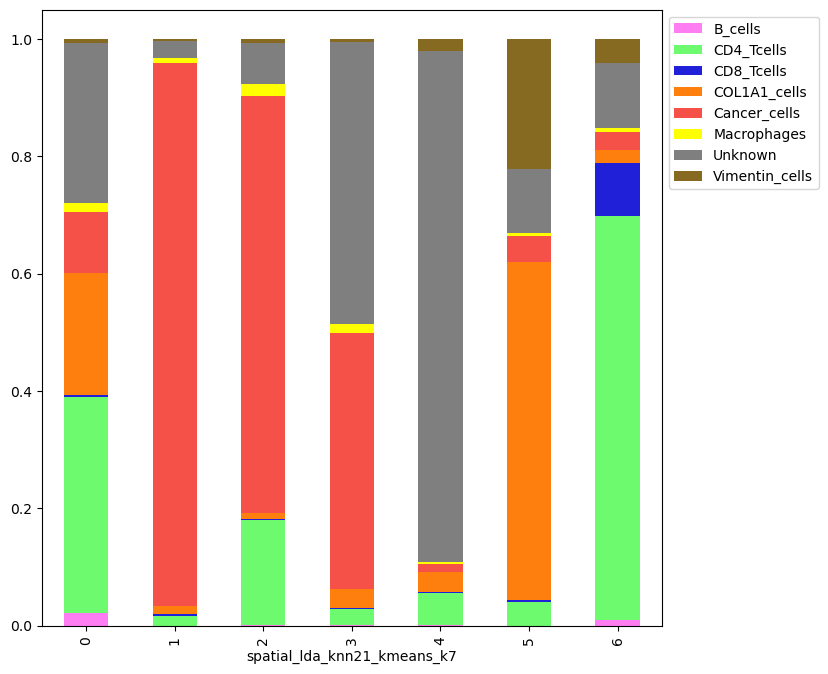

In [42]:
fig,ax = plt.subplots()
fig.set_size_inches(8, 8)
pivot_df.plot.bar(color=pheno_colors, stacked=True, ax=ax, edgecolor='none')
plt.legend(bbox_to_anchor=(1,1))
utils.export_figure(fig, "../figures/RCN_bar_plot/", suffix="RCN_bar_relative")
plt.show()